**This Notebook shows the EDA performed on CIFAR-10 dataset**

---



1. Load dependencies

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# ###############################
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Dense, Flatten, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

2. Load the CIFAR-10 dataset

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Split Training Set into Training & Validation
The original dataset has:

50,000 training images
10,000 test images
We'll use 80% for training and 20% for validation.

In [10]:
# Define split ratio
validation_ratio = 0.2
# Compute validation set size
num_train = int(train_images.shape[0] * (1 - validation_ratio))
# Split training data into train & validation sets
train_images, val_images = train_images[:num_train], train_images[num_train:]
train_labels, val_labels = train_labels[:num_train], train_labels[num_train:]

Class names in CIFAR-10

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

3. Exploratory Data Analysis (EDA) on CIFAR10

3.1. Shape of the Data

In [12]:
print("Training data shape:",train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape", val_images.shape)
print("Validation labels shape", val_labels.shape)
print("Testing data shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (40000, 32, 32, 3)
Training labels shape: (40000, 1)
Validation data shape (10000, 32, 32, 3)
Validation labels shape (10000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


3.2. Visualize Images

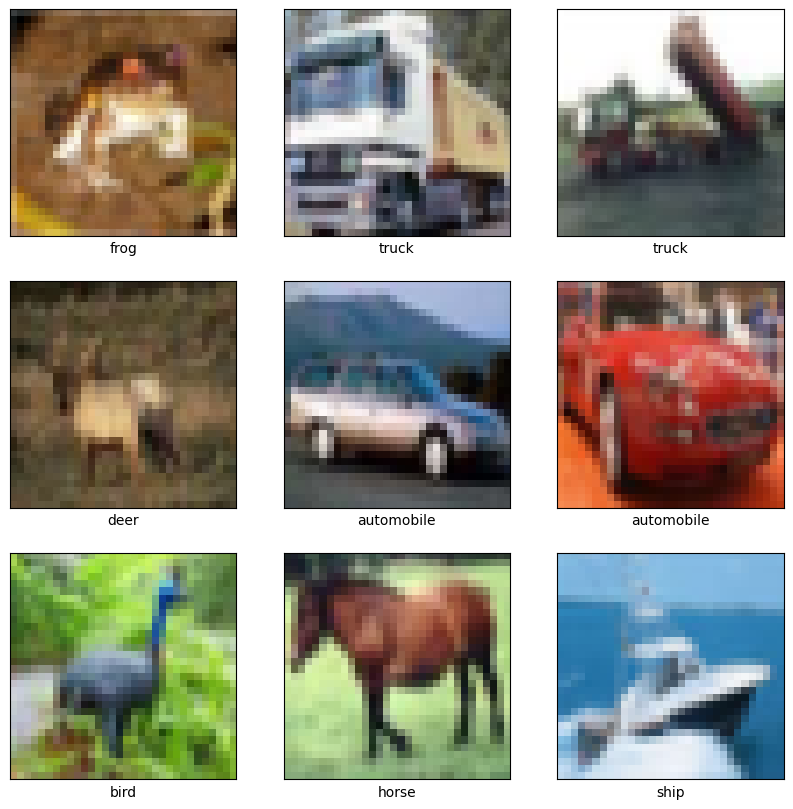

In [5]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

3.3 Class Distribution
<br>  Check the class the distribution the training and test data

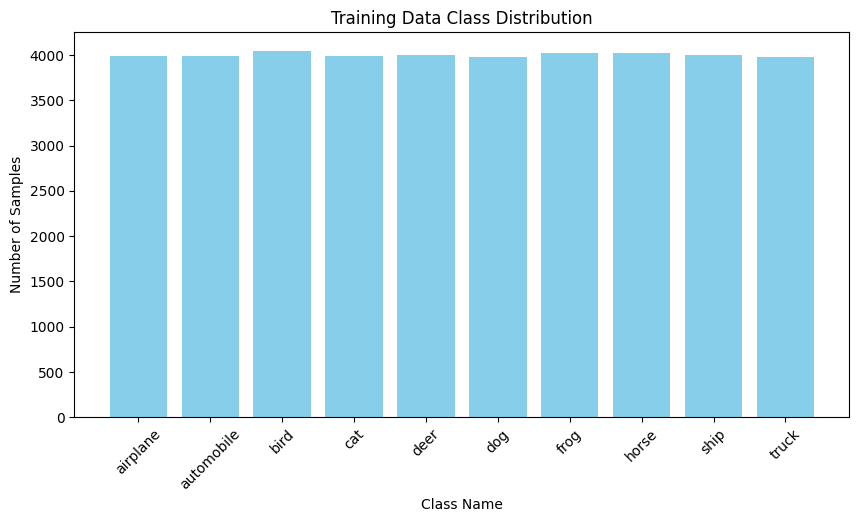

In [13]:
# Count occurrences of each class
unique_classes, class_counts = np.unique(train_labels, return_counts=True)
# Plot using Matplotlib (much faster than Seaborn)
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel("Class Name")
plt.ylabel("Number of Samples")
plt.title("Training Data Class Distribution")
plt.xticks(rotation=45)
plt.show()

Check the class the distribution of the Validation data

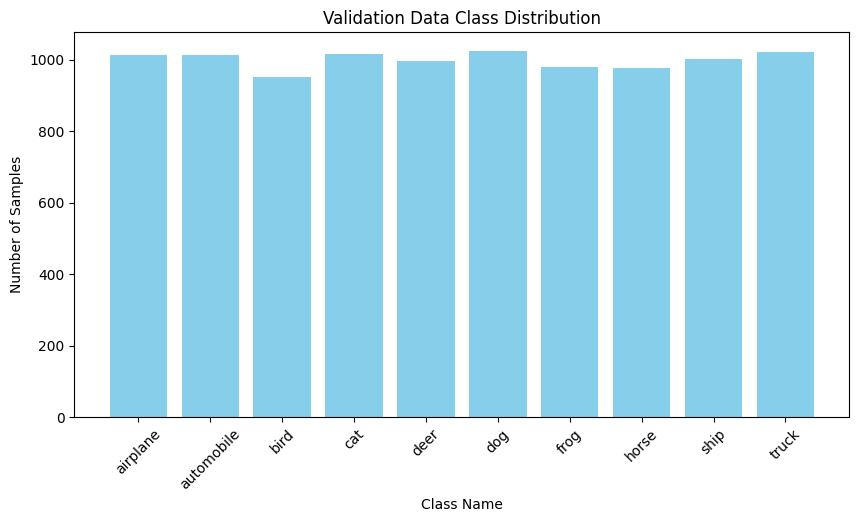

In [14]:
# Count occurrences of each class
unique_classes, class_counts = np.unique(val_labels, return_counts=True)
# Plot using Matplotlib (much faster than Seaborn)
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel("Class Name")
plt.ylabel("Number of Samples")
plt.title("Validation Data Class Distribution")
plt.xticks(rotation=45)
plt.show()

Check the class the distribution of the Test data

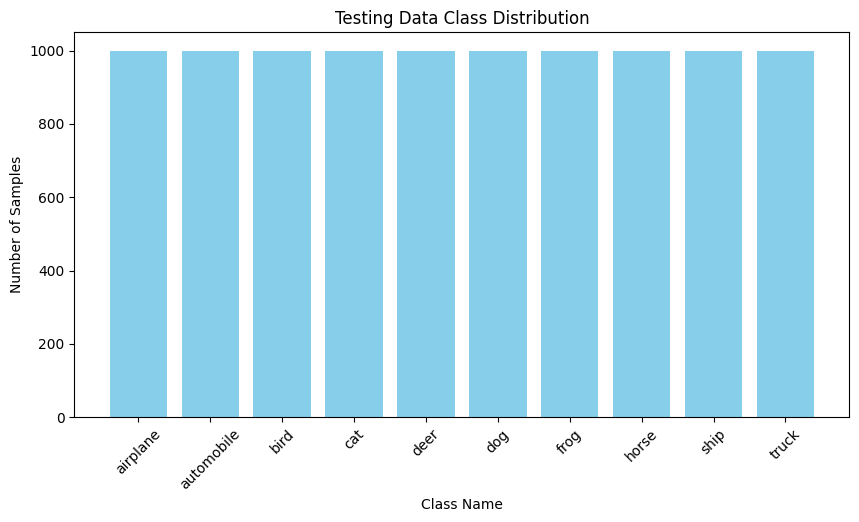

In [15]:
# Count occurrences of each class
unique_classes, class_counts = np.unique(test_labels, return_counts=True)
# Plot using Matplotlib (much faster than Seaborn)
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel("Class Name")
plt.ylabel("Number of Samples")
plt.title("Testing Data Class Distribution")
plt.xticks(rotation=45)
plt.show()

3.4. Pixel Value Distribution

For training data

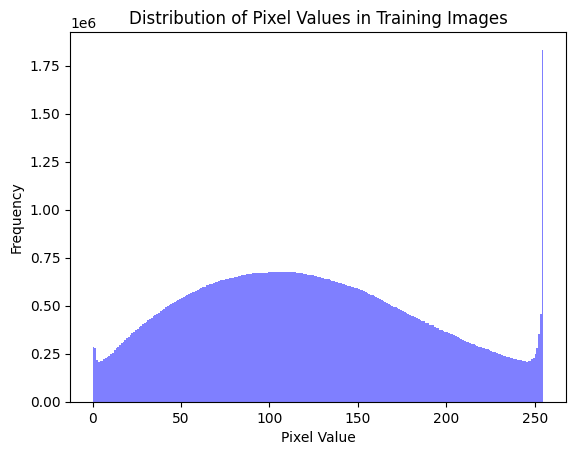

In [16]:
plt.hist(train_images.flatten(), bins=255, color='blue', alpha=0.5)
plt.title("Distribution of Pixel Values in Training Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

For Validation data

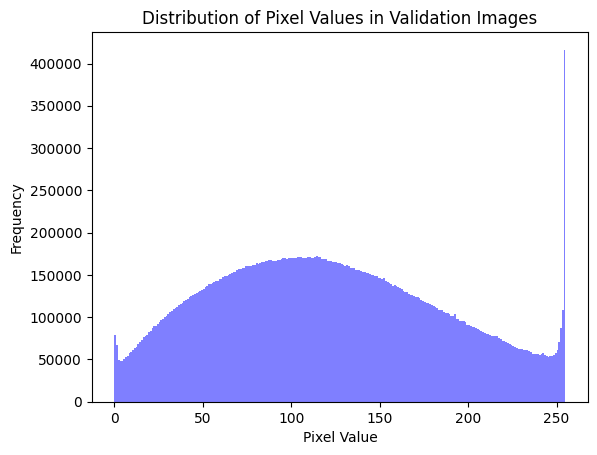

In [17]:
plt.hist(val_images.flatten(), bins=255, color='blue', alpha=0.5)
plt.title("Distribution of Pixel Values in Validation Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

For testing data

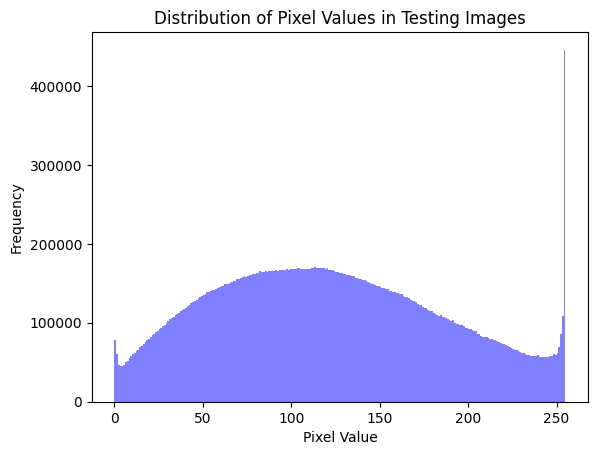

In [18]:
plt.hist(test_images.flatten(), bins=255, color='blue', alpha=0.5)
plt.title("Distribution of Pixel Values in Testing Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

3.5. Check Image Size and Aspect Ratio

In [19]:
# Function to get unique image shapes
def get_unique_shapes(images):
    image_shapes = np.array([img.shape for img in images])
    return np.unique(image_shapes, axis=0)

In [20]:
# Function to plot aspect ratio distribution
def plot_aspect_ratios(images, title):
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images]
    plt.figure(figsize=(8, 5))
    sns.histplot(aspect_ratios, bins=20, kde=True)
    plt.xlabel("Aspect Ratio (Width/Height)")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

Check unique image shapes

In [22]:
print("Unique Image Shapes in Training Set:", get_unique_shapes(train_images))
print("Unique Image Shapes in Validation Set:", get_unique_shapes(val_images))
print("Unique Image Shapes in Testing Set:", get_unique_shapes(test_images))

Unique Image Shapes in Training Set: [[32 32  3]]
Unique Image Shapes in Validation Set: [[32 32  3]]
Unique Image Shapes in Testing Set: [[32 32  3]]


Plot aspect ratio distributions

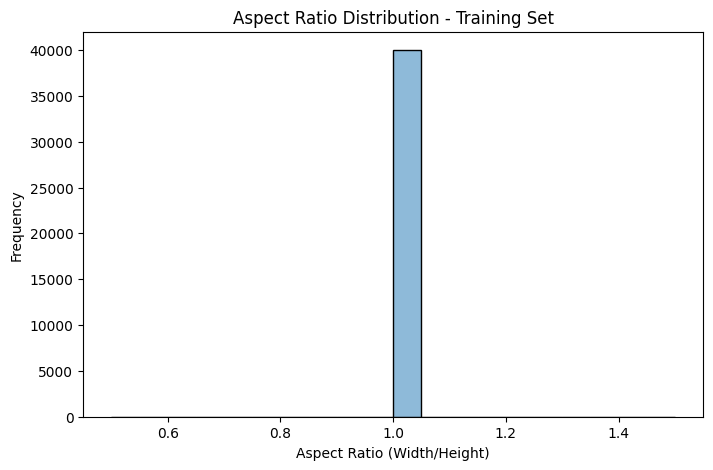

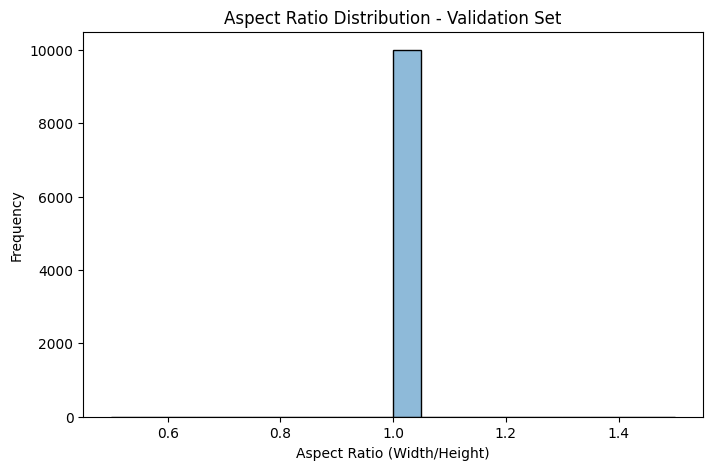

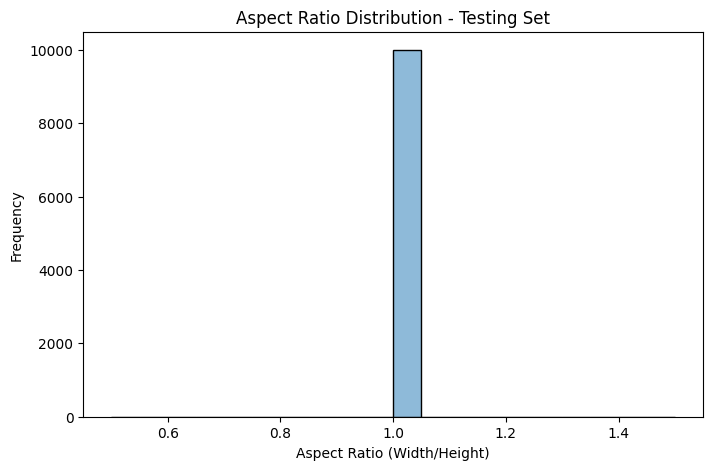

In [23]:
plot_aspect_ratios(train_images, "Aspect Ratio Distribution - Training Set")
plot_aspect_ratios(val_images, "Aspect Ratio Distribution - Validation Set")
plot_aspect_ratios(test_images, "Aspect Ratio Distribution - Testing Set")

3.6. Checking for Corrupt or Blank Images

In [24]:
# Function to count blank images (all pixel values are 0)
def count_blank_images(images):
    return sum(np.all(img == 0) for img in images)

In [25]:
# Check blank images in each dataset
num_blank_train = count_blank_images(train_images)
num_blank_val = count_blank_images(val_images)
num_blank_test = count_blank_images(test_images)
# Print results
print(f"Number of blank images in Training Set: {num_blank_train}")
print(f"Number of blank images in Validation Set: {num_blank_val}")
print(f"Number of blank images in Testing Set: {num_blank_test}")

Number of blank images in Training Set: 0
Number of blank images in Validation Set: 0
Number of blank images in Testing Set: 0


3.7. Mean and Standard Deviation of Pixel Values

In [26]:
print(f"Mean pixel value of Training data: {np.mean(train_images)}")
print(f"Standard deviation of Training data:: {np.std(train_images)}")
print(f"Mean pixel value of Validation data: {np.mean(val_images)}")
print(f"Standard deviation of Validation data:: {np.std(val_images)}")
print(f"Mean pixel value of Testing data: {np.mean(test_images)}")
print(f"Standard deviation of Testing data:: {np.std(test_images)}")

Mean pixel value of Training data: 120.6779754313151
Standard deviation of Training data:: 64.19169405614137
Mean pixel value of Validation data: 120.82592389322917
Standard deviation of Validation data:: 63.98319568446097
Mean pixel value of Testing data: 121.52915475260417
Standard deviation of Testing data:: 64.06097012299574
